<a href="https://colab.research.google.com/github/vogiahuan352/tiente/blob/main/money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [3]:
training=train_data.flow_from_directory('/content/drive/MyDrive/money/money train',target_size=(150,150), batch_size=32, class_mode='categorical')


Found 220 images belonging to 11 classes.


In [4]:
training.class_indices


{'1000': 0,
 '10000': 1,
 '100000': 2,
 '200': 3,
 '2000': 4,
 '20000': 5,
 '200000': 6,
 '500': 7,
 '5000': 8,
 '50000': 9,
 '500000': 10}

In [5]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(150,150,3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

#ANN
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(11,activation='softmax'))

#Compile
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [6]:
train=model.fit(training,epochs=20,batch_size=128,verbose=1)

Epoch 1/20
7/7 [==============================] - 45s 6s/step - loss: 3.5190 - accuracy: 0.1273
Epoch 2/20
7/7 [==============================] - 18s 2s/step - loss: 2.4015 - accuracy: 0.0955
Epoch 3/20
7/7 [==============================] - 17s 2s/step - loss: 2.3643 - accuracy: 0.1727
Epoch 4/20
7/7 [==============================] - 17s 2s/step - loss: 2.2872 - accuracy: 0.1682
Epoch 5/20
7/7 [==============================] - 17s 2s/step - loss: 2.0046 - accuracy: 0.2818
Epoch 6/20
7/7 [==============================] - 16s 2s/step - loss: 1.7341 - accuracy: 0.4045
Epoch 7/20
7/7 [==============================] - 17s 2s/step - loss: 1.5243 - accuracy: 0.4364
Epoch 8/20
7/7 [==============================] - 17s 2s/step - loss: 1.3496 - accuracy: 0.5500
Epoch 9/20
7/7 [==============================] - 18s 2s/step - loss: 1.4089 - accuracy: 0.4909
Epoch 10/20
7/7 [==============================] - 16s 2s/step - loss: 1.0776 - accuracy: 0.6500
Epoch 11/20
7/7 [======================

In [7]:
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.24717660248279572
Train Accuracy 0.9363636374473572


In [8]:
model.save("/content/drive/MyDrive/money/money.h5")


In [9]:
model_1=load_model('/content/drive/MyDrive/money/money.h5')

1/1 [==============================] - 0s 49ms/step
10K


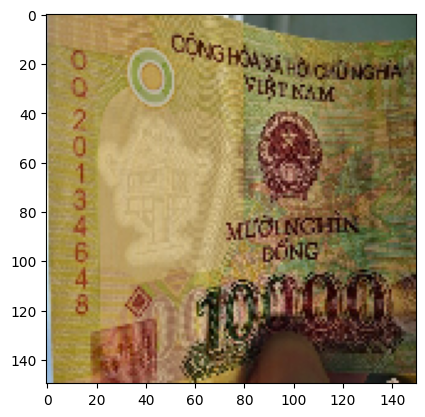

1/1 [==============================] - 0s 41ms/step
2k


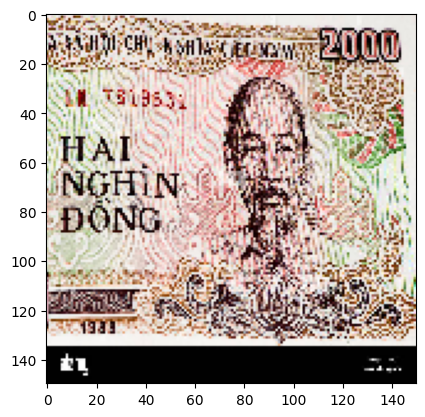

1/1 [==============================] - 0s 43ms/step
2k


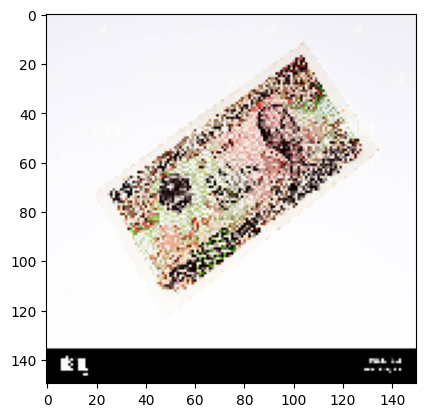

1/1 [==============================] - 0s 46ms/step
500K


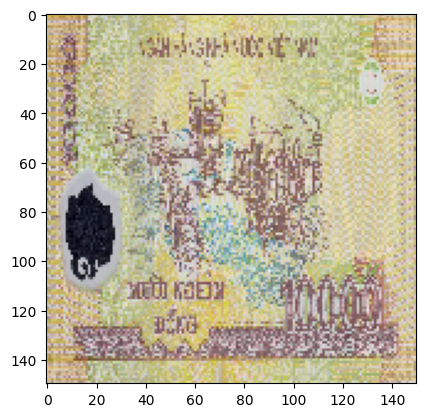

1/1 [==============================] - 0s 57ms/step
500K


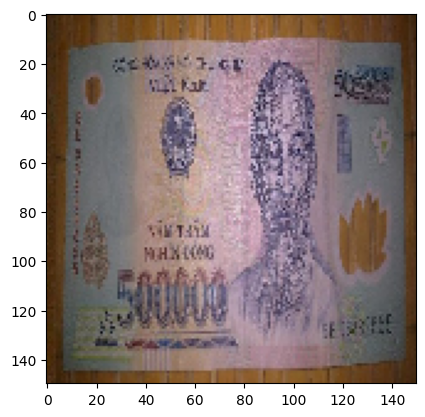

1/1 [==============================] - 0s 39ms/step
500K


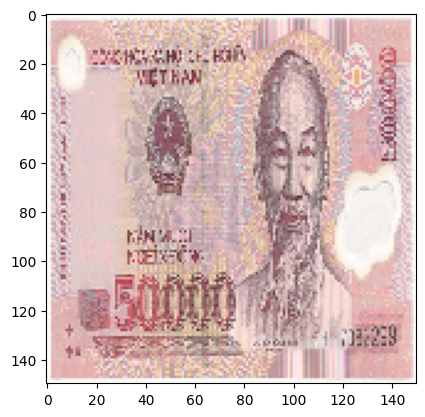

1/1 [==============================] - 0s 40ms/step
200K


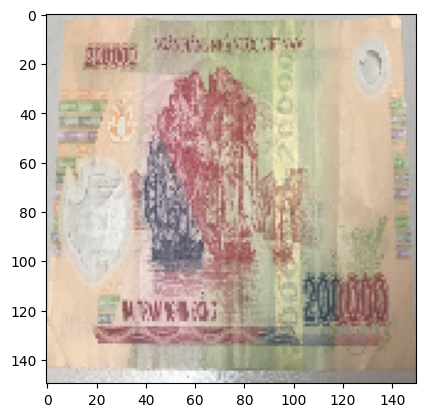

1/1 [==============================] - 0s 41ms/step
200K


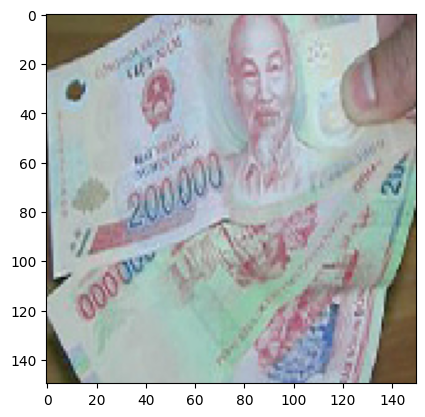

1/1 [==============================] - 0s 45ms/step
200K


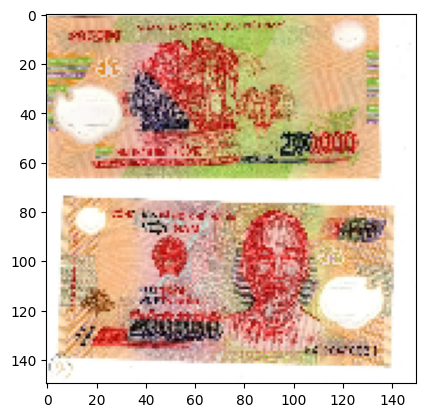

1/1 [==============================] - 0s 42ms/step
200K


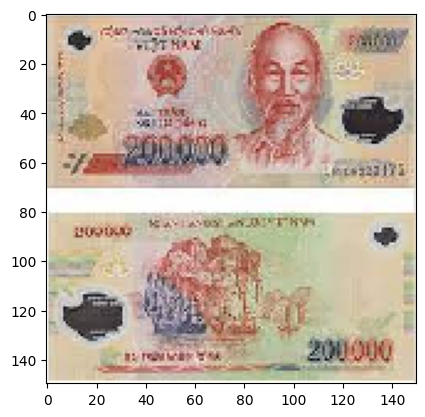

1/1 [==============================] - 0s 41ms/step
200K


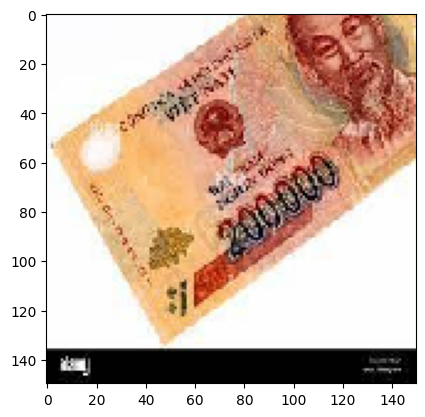

1/1 [==============================] - 0s 42ms/step
200K


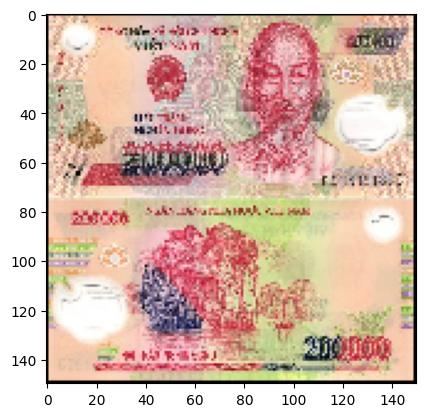

1/1 [==============================] - 0s 43ms/step
200


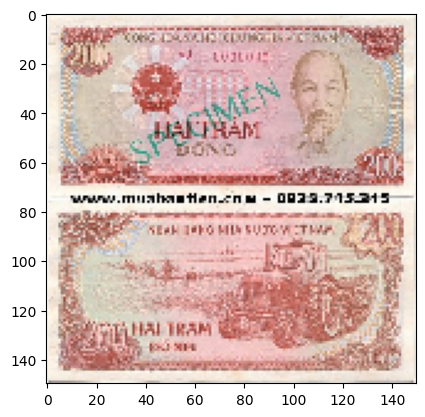

1/1 [==============================] - 0s 72ms/step
200


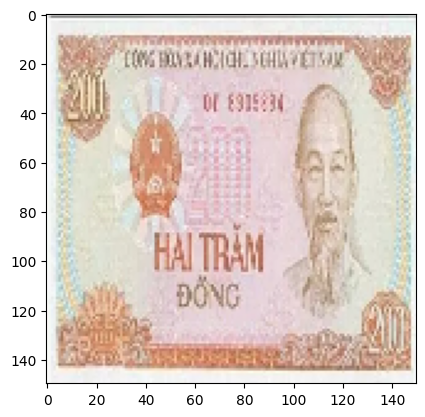

1/1 [==============================] - 0s 65ms/step
200


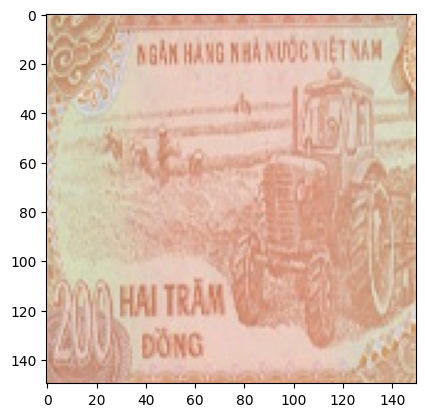

1/1 [==============================] - 0s 63ms/step
5k


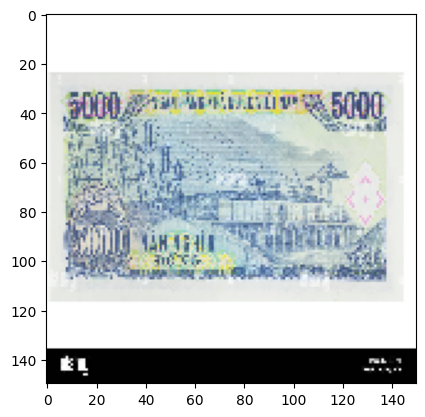

1/1 [==============================] - 0s 66ms/step
5k


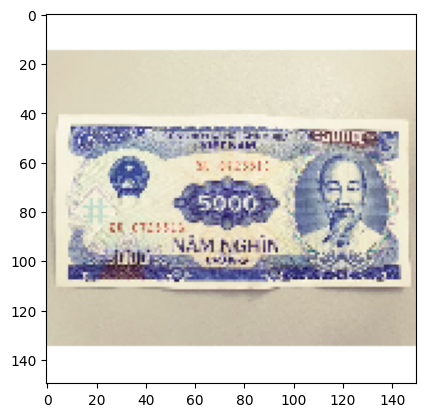

1/1 [==============================] - 0s 69ms/step
5k


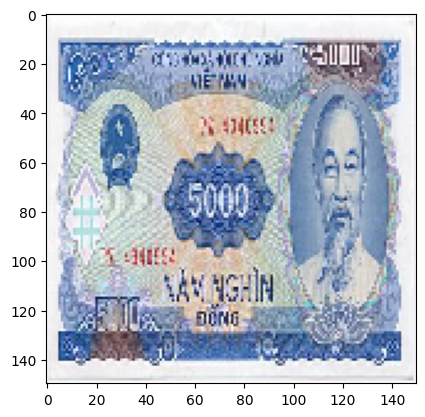

In [12]:
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
import numpy as np 
test='/content/drive/MyDrive/money/money test'

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img) 
  img=img.astype('float32') 
  img=img/255 
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax()) 
  class_name=['1K','10K','100K','200','2k','20K','200K','500','5k','50K','500K']
  print(class_name[result])
  plt.show()